In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib
import urllib.request
from datetime import datetime, timedelta, date
from sklearn.preprocessing import MinMaxScaler

In [15]:
variable = 'new_cases_'
initialdate = '2020-01-01'   # first day of the year, where most of our data starts
# moving intialdate by 6, since we later apply 7-day rolling mean to our data:
initialdateshift = str(date.fromordinal(datetime.strptime(initialdate, '%Y-%m-%d').toordinal() + 6)) 
enddate = str(date.fromordinal(date.today().toordinal()-1))   # yesterday's date: last day of available data

country = 'Spain'
col = variable + country
url1 = 'https://raw.githubusercontent.com/martaarozarena/KSchool-Master-Final-Project/master/data/endogenous.csv'
covid_ctry_varR = pd.read_csv(url1, parse_dates=['date'], index_col=['date'], usecols=['date', col])

In [23]:
url2 = 'https://raw.githubusercontent.com/martaarozarena/KSchool-Master-Final-Project/master/data/exogenous.csv'
exog = pd.read_csv(url2, parse_dates=['date'], index_col=['date'])
exog = exog.loc[:, exog.columns.str.contains(country)]

In [24]:
exog.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24',
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-29', '2020-08-30'],
              dtype='datetime64[ns]', name='date', length=243, freq=None)

In [29]:
forecastdays = 14
new_begin = str(date.fromordinal(datetime.strptime(enddate, '%Y-%m-%d').toordinal() + 1))
new_date = str(date.fromordinal(datetime.strptime(enddate, '%Y-%m-%d').toordinal() + forecastdays))
new_index = pd.date_range(initialdate, new_date, freq='D')
futur = exog.reindex(new_index).interpolate()

In [30]:
futur.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07',
               '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
               '2020-09-12', '2020-09-13'],
              dtype='datetime64[ns]', length=257, freq='D')

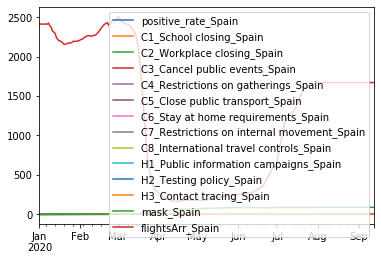

In [31]:
futur.plot()

In [32]:
futur.tail(20)

,positive_rate_Spain,C1_School closing_Spain,C2_Workplace closing_Spain,C3_Cancel public events_Spain,C4_Restrictions on gatherings_Spain,C5_Close public transport_Spain,C6_Stay at home requirements_Spain,C7_Restrictions on internal movement_Spain,C8_International travel controls_Spain,H1_Public information campaigns_Spain,H2_Testing policy_Spain,H3_Contact tracing_Spain,mask_Spain,flightsArr_Spain
2020-08-25,0.077857,2.0,2.0,2.0,4.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,89.0,1670.571429
2020-08-26,0.077857,2.0,2.0,2.0,4.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,89.0,1670.571429
2020-08-27,0.077857,2.0,2.0,2.0,4.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,89.0,1670.571429
2020-08-28,0.077857,2.0,2.0,2.0,4.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,89.0,1670.571429
2020-08-29,0.077857,2.0,2.0,2.0,4.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,89.0,1670.571429
2020-08-30,0.077857,2.0,2.0,2.0,4.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,89.0,1670.571429
2020-08-31,0.077857,2.0,2.0,2.0,4.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,89.0,1670.571429
2020-09-01,0.077857,2.0,2.0,2.0,4.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,89.0,1670.571429
2020-09-02,0.077857,2.0,2.0,2.0,4.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,89.0,1670.571429
2020-09-03,0.077857,2.0,2.0,2.0,4.0,0.0,1.0,2.0,3.0,2.0,2.0,1.0,89.0,1670.571429
